# **Census Income Project**

## **1. Dataset loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **2.Checking basic details**

In [5]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [80]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
________________________________________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
________________________________________
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
________________________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

**There is no missing values present when we checked earlier but null values are present in the form of "?"**

In [81]:
df= df.replace(' ?', np.nan)

In [82]:
print(df.isnull().sum())

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64


Replacing missing values with mode

In [11]:
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)

In [12]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


## **3.EDA**

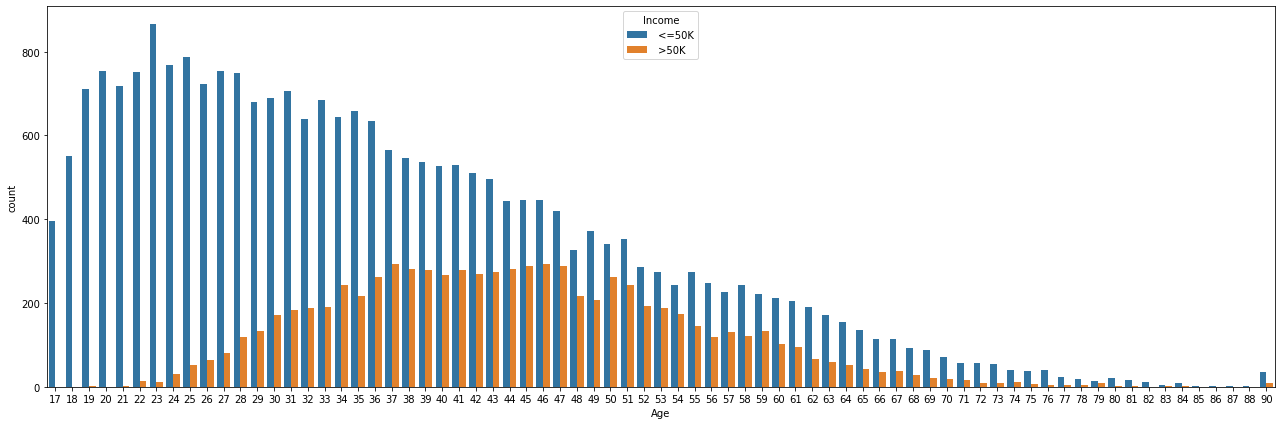

In [13]:
plt.figure(figsize=(22,7))
sns.countplot(x='Age',hue='Income',data=df)

We can notice here in age of 17 to 30 most of people having less than 50k of income and after when in increasing age we see in category of more then 50k no of people are increasing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

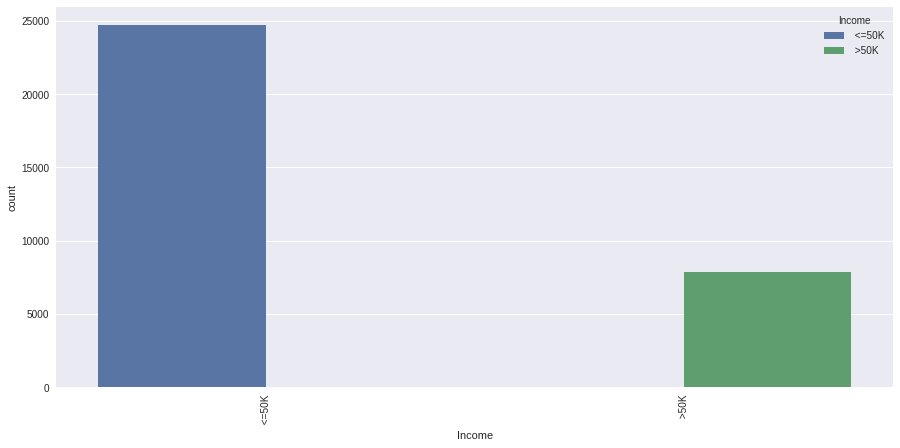

In [92]:
plt.figure(figsize=(15,7))
sns.countplot(x='Income',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

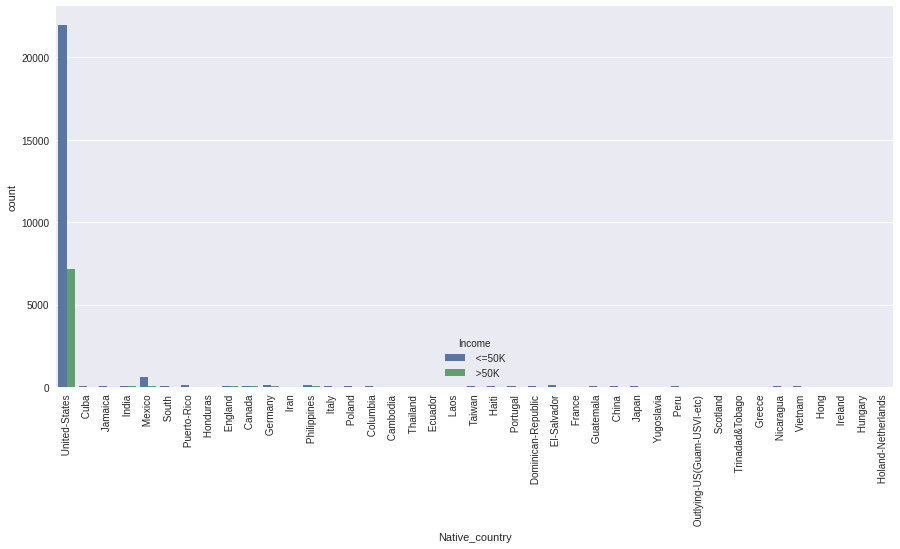

In [83]:
plt.figure(figsize=(15,7))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

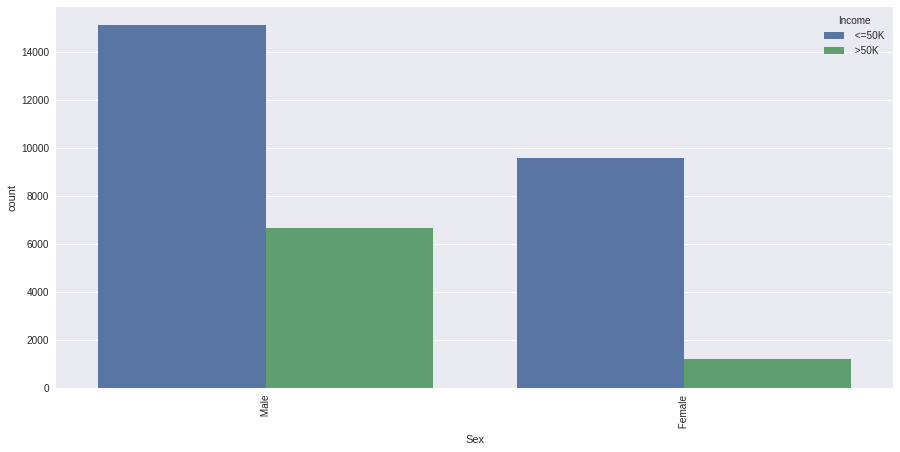

In [91]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

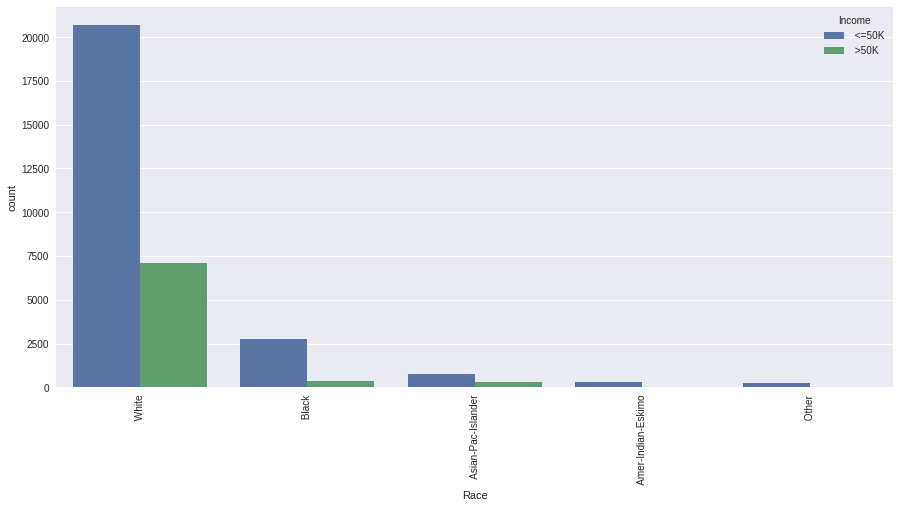

In [90]:
plt.figure(figsize=(15,7))
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

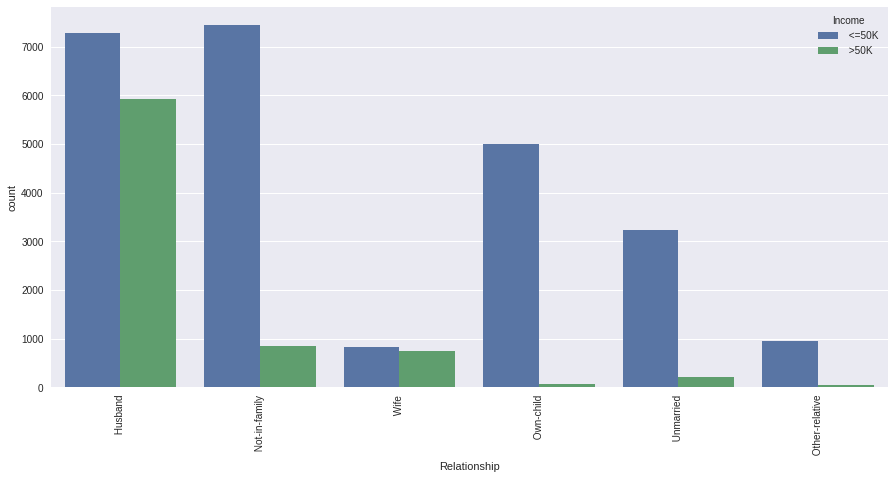

In [89]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

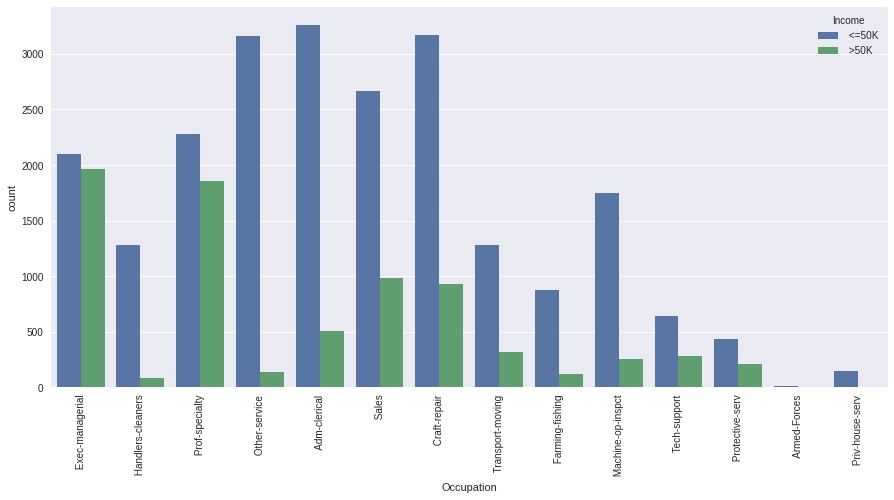

In [84]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

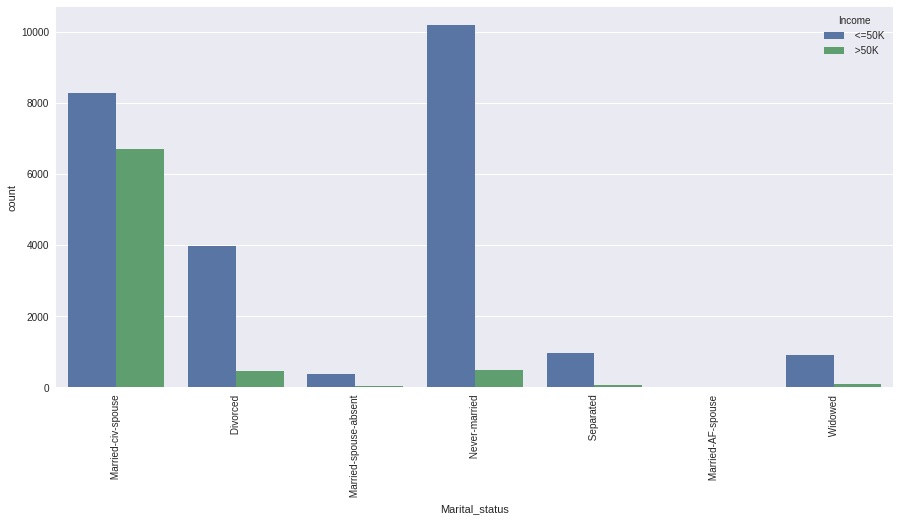

In [88]:
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

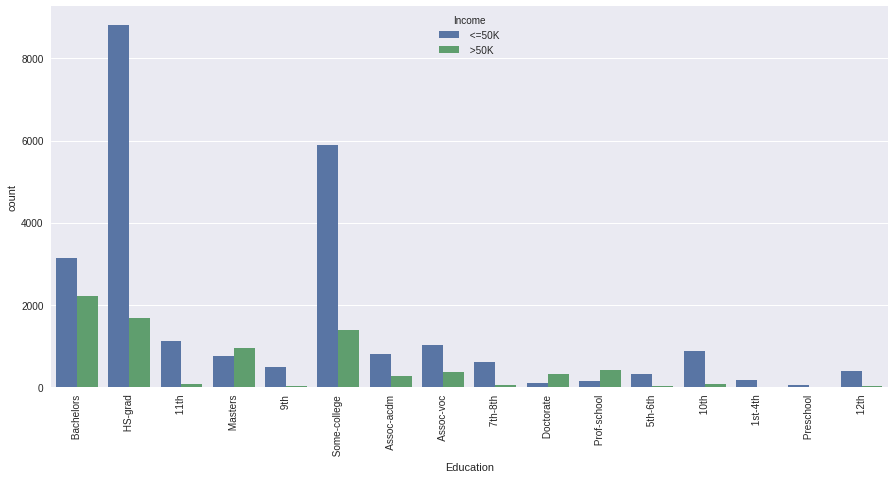

In [87]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=90)

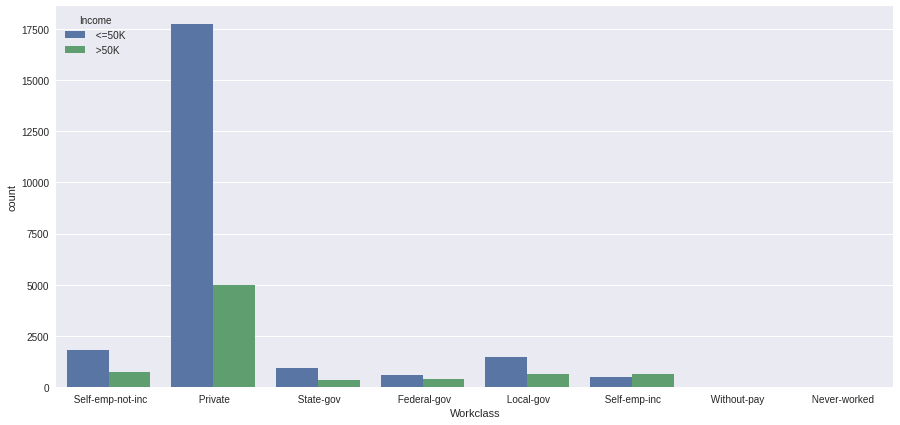

In [85]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=df)

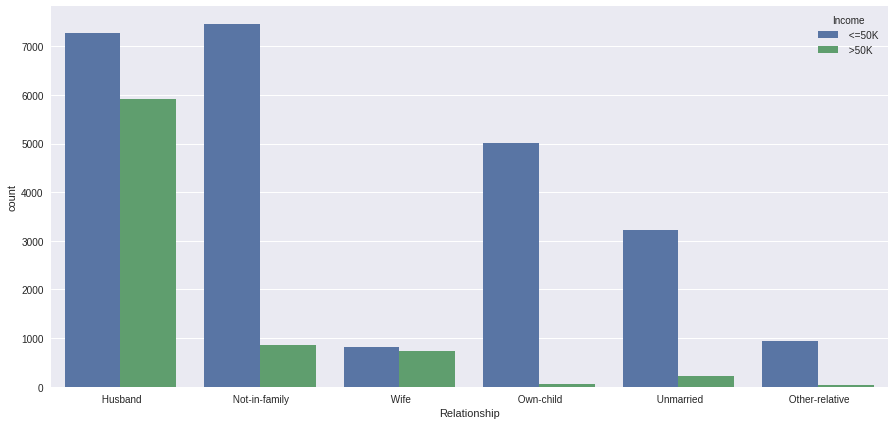

In [86]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)

## **4. Data pre-processing**

### **Encoding**

In [25]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [26]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [28]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


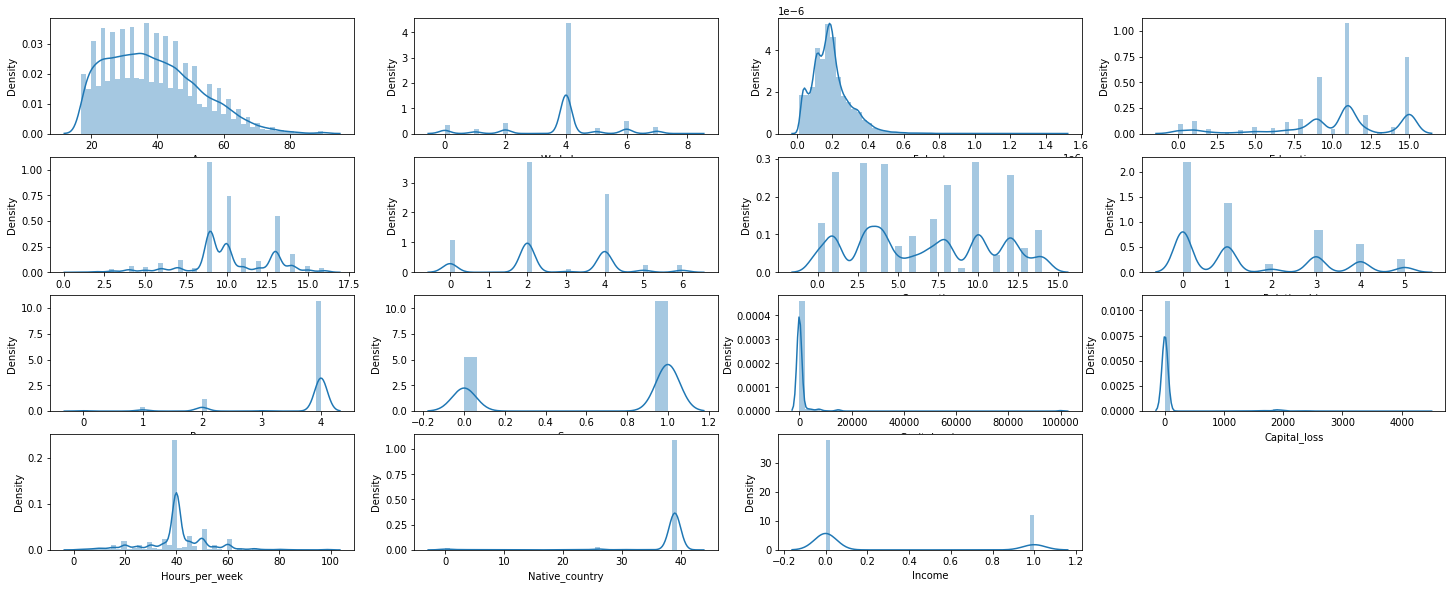

In [29]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]])

In [30]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


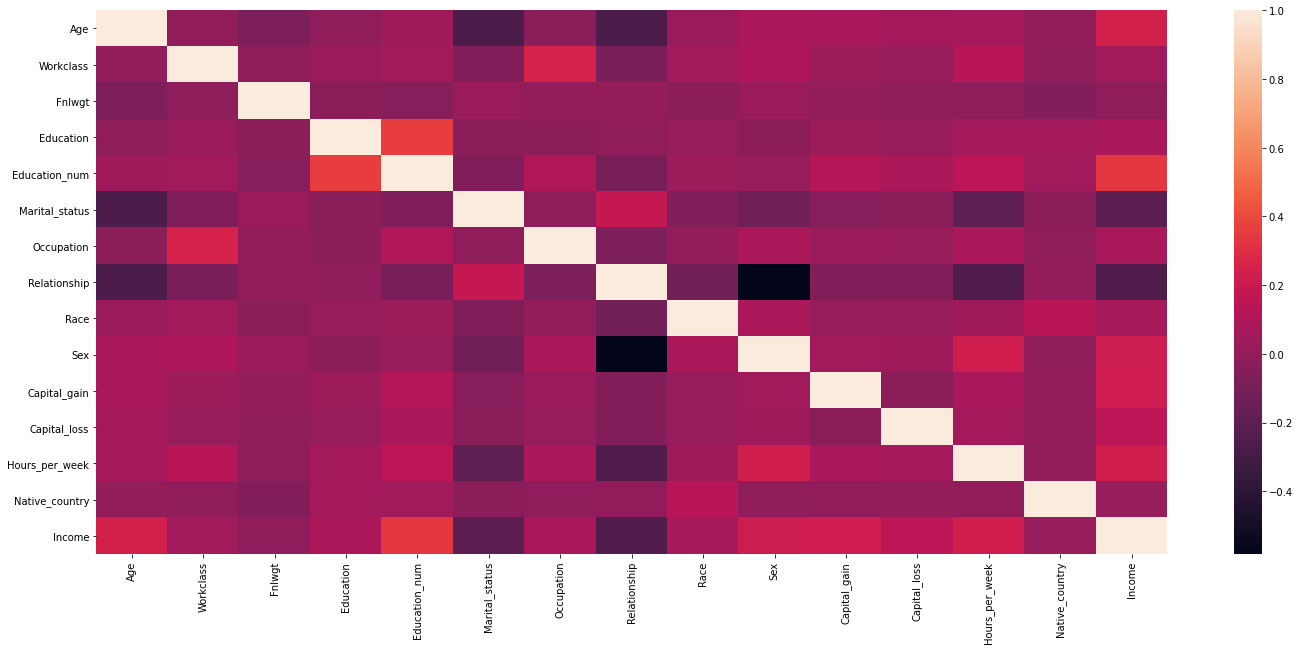

In [31]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

### **Skewness removal**

In [32]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [33]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (32560, 15)
[[0.83709708 1.46388339 1.0087417  ... 2.22212013 0.29157343 0.5632099 ]
 [0.04264043 0.09012148 0.24504633 ... 0.03542999 0.29157343 0.5632099 ]
 [1.05703146 0.09012148 0.42576955 ... 0.03542999 0.29157343 0.5632099 ]
 ...
 [1.42358875 0.09012148 0.3588108  ... 0.03542999 0.29157343 0.5632099 ]
 [1.21562378 0.09012148 0.11092744 ... 1.65520046 0.29157343 0.5632099 ]
 [0.98372    0.77700244 0.92986178 ... 0.03542999 0.29157343 1.77553698]]


In [34]:
threshold = 3
print(np.where(z > 3))

(array([    3,     9,    10, ..., 32532, 32550, 32552]), array([13, 12,  8, ...,  8,  8,  8]))


In [35]:
after_zscore = df[(z < 3).all(axis=1)]

In [36]:
after_zscore.shape

(27417, 15)

In [37]:
df.shape

(32560, 15)

In [38]:
100-(27770/32560)*100

14.711302211302211

### **Removing outlier using z score is not suggested bcz of 14% data loss**

In [39]:
df1=df[['Age','Fnlwgt','Capital_gain','Capital_loss']]

In [40]:
df1 = np.sqrt(df)

df1.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,2.44949,288.636450,3.000000,3.605551,1.414214,2.000000,0.000000,2.000000,1.0,0.0,0.0,3.605551,6.244998,0.0
1,6.164414,2.00000,464.377002,3.316625,3.000000,0.000000,2.449490,1.000000,2.000000,1.0,0.0,0.0,6.324555,6.244998,0.0
2,7.280110,2.00000,484.480134,1.000000,2.645751,1.414214,2.449490,0.000000,1.414214,1.0,0.0,0.0,6.324555,6.244998,0.0
3,5.291503,2.00000,581.729318,3.000000,3.605551,1.414214,3.162278,2.236068,1.414214,0.0,0.0,0.0,6.324555,2.236068,0.0
4,6.082763,2.00000,533.462276,3.464102,3.741657,1.414214,2.000000,2.236068,2.000000,0.0,0.0,0.0,6.324555,6.244998,0.0


In [41]:
df1.skew()

Age               0.204335
Workclass        -2.283787
Fnlwgt            0.189066
Education        -2.062119
Education_num    -1.023535
Marital_status   -1.203232
Occupation       -0.643240
Relationship      0.150789
Race             -3.472696
Sex              -0.719244
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week   -0.984894
Native_country   -4.428747
Income            1.212383
dtype: float64

In [42]:
df=df1

In [43]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

4.0990195135927845

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(14772, 15)


### Removing data using interquartile methord is also not recomended because of high loss of data.

## **5.Feature Engineering**

In [45]:
y = df['Income']
x = df.drop('Income', axis = 1)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### **Treating data imbalence**

In [48]:
print(df['Income'].value_counts())

0.0    24719
1.0     7841
Name: Income, dtype: int64


In [49]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Income==0]
label1=X[X.Income==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.Income.value_counts()

1.0    19761
0.0    19761
Name: Income, dtype: int64

In [50]:
x_train= unsampled.drop(columns='Income')
y_train= unsampled['Income']

In [51]:
x_train.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

### **Scaling**

In [52]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [53]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [54]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000
mean,0.402401,0.675685,0.308652,0.813131,0.742649,0.589786,0.646432,0.322786,0.951873,0.730935,0.043148,0.042951,0.604761,0.931941
std,0.190872,0.182901,0.117988,0.192942,0.143390,0.239436,0.256683,0.370285,0.142750,0.443480,0.135109,0.163784,0.112781,0.167175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269339,0.707107,0.234453,0.774597,0.666667,0.577350,0.462910,0.000000,1.000000,0.000000,0.000000,0.000000,0.594931,0.975305
50%,0.410433,0.707107,0.311892,0.856349,0.720759,0.577350,0.707107,0.000000,1.000000,1.000000,0.000000,0.000000,0.594931,0.975305
75%,0.536361,0.707107,0.374866,0.894427,0.868517,0.816497,0.845154,0.632456,1.000000,1.000000,0.000000,0.000000,0.670400,0.975305
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## **6.Model construction**

**RandomForestClassifier**

In [93]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      4958
         1.0       0.69      0.68      0.69      1554

    accuracy                           0.85      6512
   macro avg       0.80      0.79      0.80      6512
weighted avg       0.85      0.85      0.85      6512

0.8524262899262899


In [108]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv =3).mean()
randomforest_cv

0.924750771722079

**SVC**

In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7919226044226044
[[3776 1182]
 [ 173 1381]]
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85      4958
         1.0       0.54      0.89      0.67      1554

    accuracy                           0.79      6512
   macro avg       0.75      0.83      0.76      6512
weighted avg       0.86      0.79      0.81      6512



In [96]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 5).mean()
svc_cv

0.7930896805896805

**DecisionTreeClassifier**

In [97]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.8184889434889435


,precision,recall,f1-score,support
0.0,0.877298,0.885438,0.881349,4958.000000
1.0,0.623342,0.604891,0.613978,1554.000000
accuracy,0.818489,0.818489,0.818489,0.818489
macro avg,0.750320,0.745164,0.747663,6512.000000
weighted avg,0.816695,0.818489,0.817545,6512.000000


In [98]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.8121007371007372

**GaussianNB**

In [99]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7933046683046683


,precision,recall,f1-score,support
0.0,0.919805,0.798104,0.854644,4958.000000
1.0,0.547059,0.777992,0.642402,1554.000000
accuracy,0.793305,0.793305,0.793305,0.793305
macro avg,0.733432,0.788048,0.748523,6512.000000
weighted avg,0.830854,0.793305,0.803995,6512.000000


In [100]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.814066339066339

**KNeighborsClassifier**

In [101]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7837837837837838


,precision,recall,f1-score,support
0.0,0.917254,0.787011,0.847156,4958.000000
1.0,0.532329,0.773488,0.630640,1554.000000
accuracy,0.783784,0.783784,0.783784,0.783784
macro avg,0.724792,0.780249,0.738898,6512.000000
weighted avg,0.825397,0.783784,0.795487,6512.000000


In [102]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.8061732186732187

**LogisticRegression**

In [103]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression()

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.7874692874692875
[[3884 1074]
 [ 310 1244]]


,precision,recall,f1-score,support
0.0,0.926085,0.783380,0.848776,4958.000000
1.0,0.536670,0.800515,0.642562,1554.000000
accuracy,0.787469,0.787469,0.787469,0.787469
macro avg,0.731377,0.791948,0.745669,6512.000000
weighted avg,0.833156,0.787469,0.799566,6512.000000


In [104]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 10).mean()
logisticregression_cv

0.8074324324324325

**Choosing decission tree classifier and random forest for hyper parameter tuning.**

## **7.HYPER PARAMETER TUNING**

**FINDING BEST RANDOM STATE**

In [69]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.0399755582900403
least value 0 1.0399755582900403
1 1.062148100272585
2 1.0225465831996394
least value 2 1.0225465831996394
3 1.028599203690954
4 1.0497791426742107
5 1.044572991129113
6 1.0419185423079216
7 1.0224407335697534
least value 7 1.0224407335697534
8 1.0199973993203675
least value 8 1.0199973993203675
9 1.023653842725873
10 1.038938795759615
11 1.0216269769181896
12 1.0398063125854853
13 1.0088145483879354
least value 13 1.0088145483879354
14 1.051340816650509
15 1.0340479008231616
16 1.0518911402159932
17 1.0295743990990227
18 1.0184629734310797
19 1.0271274350498203
20 1.044462481962482
21 1.0192648779229465
22 1.0276108845215646
23 1.0689810893831693
24 1.0256448877425441
25 1.0428500726760088
26 1.06128396612454
27 0.9998656988259615
least value 27 0.9998656988259615
28 1.0187216505014478
29 0.9917615580037991
least value 29 0.9917615580037991
30 1.0209017228919104
31 1.0472955490797833
32 1.056115134443713
33 1.009505463556653
34 1.0251449494795346
35 1.045126888938

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=74)

**DecisionTreeClassifier**

In [71]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [72]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [62]:
from sklearn.tree import DecisionTreeClassifier
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state = 74,max_depth=10,min_samples_leaf= 7, min_samples_split= 6)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8625614250614251


In [64]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.8528255528255528

In [75]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

**RandomForestClassifier**

In [76]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  9.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [77]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

In [65]:
clf= RandomForestClassifier(criterion='gini',min_samples_split=3,n_estimators=200,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.91      4952
         1.0       0.76      0.65      0.70      1560

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

0.8677825552825553


In [66]:
print(randomforest_accu)

0.8677825552825553


In [67]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8592445771207663

Decission Tree with accuracy 0.862 and cv score 0.852

Random forest with accuracy 0.867 and cv score 0.859

## **8.Evaluation metrics**

In [68]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [69]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, fianlRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, fianlRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, fianlRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, fianlRFC)
print('F1 score: %f' % f1_rfc)


print("------------------------------------------")
print("Decision Tree")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_dt = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy_dt)
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, pred)
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, pred)
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, pred)
print('F1 score: %f' % f1_dt)

Random Forest
-----------------------------------------
Accuracy: 0.867783
Precision: 0.761406
Recall: 0.652564
F1 score: 0.702796
------------------------------------------
Decision Tree
-----------------------------------------
Accuracy: 0.862561
Precision: 0.753623
Recall: 0.633333
F1 score: 0.688262


### **choosing Random forest as the best model with 86.7% accuracy.**

## **9. roc_auc_score**

In [70]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [71]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [72]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9156617631829667 0.7672372726896151


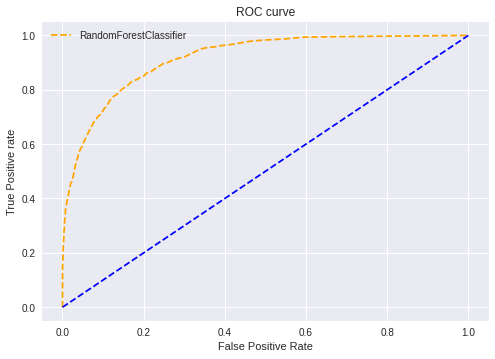

In [73]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## **10.Saving the model**

In [74]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']